In [98]:
import PyPDF2 as pdf2
import json
import pandas as pd
import numpy as np
from tabula import read_pdf
from tabulate import tabulate
import matplotlib.pyplot as plt
import folium
import geopandas as gpd

dataPath = "../data/"


In [47]:
'''
WIC Data
'''
fileName = "keydata-october-2022.pdf"
pdf = open(dataPath+fileName,'rb')
pdfReader = pdf2.PdfReader(pdf)

for i in range(len(pdfReader.pages)):
    pageNum = i
    pageObj = pdfReader.pages[pageNum]

    with open("./WIC/page" + str(pageNum) + "txt", "w") as f:
        
        f.write(pageObj.extract_text())

    f.close()

# with open("source page" + str(pageNum), "w") as f:
    
#     f.write(pageObj.get_contents.decode("utf-8"))

# f.close()



  SHORTNAME  FID    WHITE   BLACK   AIAN    ASIAN   HPI   OTHER  Shape__Area
1        D2  2.0  53120.0  4520.0  269.0  13604.0  55.0  4893.0     0.001969
[1.0 44656.0 3637.0 783.0 5080.0 50.0 20935.0 0.0029850570322196]
[2.0 53120.0 4520.0 269.0 13604.0 55.0 4893.0 0.001968731256511]
[3.0 29284.0 14990.0 492.0 13190.0 45.0 9927.0 0.0110066903946517]
[4.0 10515.0 40030.0 653.0 3093.0 44.0 11569.0 0.0013236215525012]
[5.0 20392.0 35584.0 475.0 2022.0 42.0 12727.0 0.0022998905149052]
[6.0 48416.0 8694.0 516.0 7271.0 47.0 9359.0 0.0027128071353672]
[7.0 18740.0 28006.0 519.0 6565.0 60.0 12825.0 0.0009894554646052]
[8.0 47430.0 5493.0 332.0 16405.0 54.0 5626.0 0.000802711510687]
[9.0 45548.0 4457.0 486.0 15390.0 71.0 7577.0 0.0012630510964299]


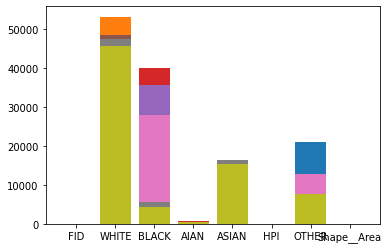

In [96]:
'''
Shapefile
This dataset describes the population of the district respect to race.
'''

districtPop = pd.read_csv(dataPath + "Shapefile.csv")
col = ['FID','LONGNAME', 'SHORTNAME','DISTRICT', 'COLOR',
 'TOTAL',
 'TARGET_DEV',
 'TARGET_D_1',
 'TOTAL18',
 'TOTALHISP',
 'TOTALNH',
 'WHITENH',
 'BLACKNH',
 'AIANNH',
 'ASIANNH',
 'HPINH',
 'OTHERNH',
 'MLTMNNH',
 'HISP18',
 'NONHISP18',
 'WHITENH18',
 'BLACKNH18',
 'AIANNH18',
 'ASIANNH18',
 'HPINH18',
 'OTHERNH18',
 'MLTMNNH18',
 'WHITE','BLACK','AIAN', 'ASIAN','HPI','OTHER',
 'MLTMN',
 'Shape__Area',
 'Shape__Length',
 'DistrictText']
cols = ['SHORTNAME','FID','WHITE','BLACK','AIAN', 'ASIAN','HPI','OTHER', 'Shape__Area']
districtPop = districtPop[cols]
for colName in cols[1:]:
    districtPop[colName] = districtPop[colName].astype(float) 
# print(districtPop.head)
numDistrict = len(districtPop["SHORTNAME"])

fig, ax = plt.subplots()
y = []
print((districtPop.loc[districtPop['FID'] == 2]))
for i in range(numDistrict):
    # print(districtPop)
    y=districtPop.loc[districtPop['FID'] == i+1]
    y=np.array(y)
    print(y[0][1:])
    ax.bar(cols[1:], y[0][1:])

plt.show()


In [99]:


shapefile = gpd.read_file(dataPath+ "City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")
print(shapefile)

   FID    LONGNAME SHORTNAME  DISTRICT       COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1  -851848832  76830        1758   
1    2  District 2        D2         2   465990528  77466        2394   
2    3  District 3        D3         3   494969216  73285       -1787   
3    4  District 4        D4         4      -65408  72917       -2155   
4    5  District 5        D5         5   412292224  75436         364   
5    6  District 6        D6         6  1971620992  76523        1451   
6    7  District 7        D7         7  1946148736  72147       -2925   
7    8  District 8        D8         8   639511936  76370        1298   
8    9  District 9        D9         9  -119742707  74673        -399   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834    